# Classification and Regression Trees

## Tuesday June 27, 2017

### Classification

In this task we have some data from the HR department of a company. Our goal is to understand why people are leaving and if there's anything we can do to stop the good people from leaving. This will be a classification problem where the category we are trying to predict is 'leave' or 'stay'.

The data we have contains the following infromation:

- satisfaction_level: How satisfied is an employee with their current role
- last_evaluation: How a manager has rated an employees performance
- number_project: The number of projects the employee has worked on
- average_monthly_hours: The average number of hours they work (billed?) in the month
- time_spend_company: Number of years of service.
- Work_accident: Whether or not they have had a work accident
- left: whether or not an employee left (our y-variable in this case)
- promoted_last_5years: Was the employee promoted in the last 5 years
- sales: What division the employee worked in
- salary: 3-level salary score (low, medium, high)


In [1]:
from sklearn import tree
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [7]:
#Read data
hr_data = pd.read_csv('../../data/HR_comma_sep.csv')
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [10]:
#Check the unique values for the strings
print(hr_data['sales'].unique())

print(hr_data['salary'].unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
['low' 'medium' 'high']


In [11]:
# Convert categorical columns to binary representations
hr_data_with_dummies = pd.get_dummies(data=hr_data, columns = ['sales', 'salary'], prefix = ['sales', 'salary'] )
hr_data_with_dummies.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.006373,0.006615,...,-0.012841,0.007172,0.005715,0.006919,0.004007,0.009185,-0.009345,0.029708,-0.047415,0.031367
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,0.001269,-0.005471,...,-0.009645,0.009662,-0.000311,-0.001989,-0.023031,0.017104,0.013742,-0.020628,0.005221,0.006191
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,0.003287,0.009703,...,-0.027356,0.009728,-0.023064,0.000829,-0.013388,0.000303,0.028596,-0.008726,-0.002504,0.007377
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,0.006967,-0.001177,...,-0.010783,0.000834,-0.008210,-0.005494,-0.001718,-0.002444,0.013638,-0.007101,-0.001050,0.005007
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,-0.006053,-0.021116,...,-0.022194,0.115436,0.012096,-0.003919,0.015150,-0.030111,-0.027991,0.039953,-0.040110,0.018299
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,-0.009293,0.017167,...,-0.015649,0.011242,0.011367,0.001246,-0.004955,0.012079,-0.006070,0.009040,-0.006813,0.001856
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.010925,-0.046596,...,0.028249,-0.046035,-0.000859,-0.011029,0.009923,0.010700,0.020076,-0.120929,0.134722,-0.068833
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,-0.038942,0.021268,...,-0.001531,0.128087,0.049253,-0.037288,0.012353,-0.035605,-0.035799,0.076756,-0.082832,0.040985
sales_IT,0.006373,0.001269,0.003287,0.006967,-0.006053,-0.009293,-0.010925,-0.038942,1.000000,-0.070240,...,-0.067949,-0.062500,-0.073524,-0.075503,-0.184302,-0.124705,-0.140484,-0.016089,0.005116,0.003775
sales_RandD,0.006615,-0.005471,0.009703,-0.001177,-0.021116,0.017167,-0.046596,0.021268,-0.070240,1.000000,...,-0.053570,-0.049274,-0.057965,-0.059525,-0.145300,-0.098315,-0.110755,-0.015115,-0.011887,0.020402


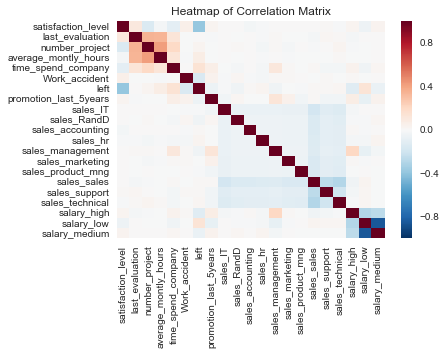

In [12]:
#Plot a Correlation Matrix
corr = hr_data_with_dummies.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
sns.plt.title('Heatmap of Correlation Matrix')
corr

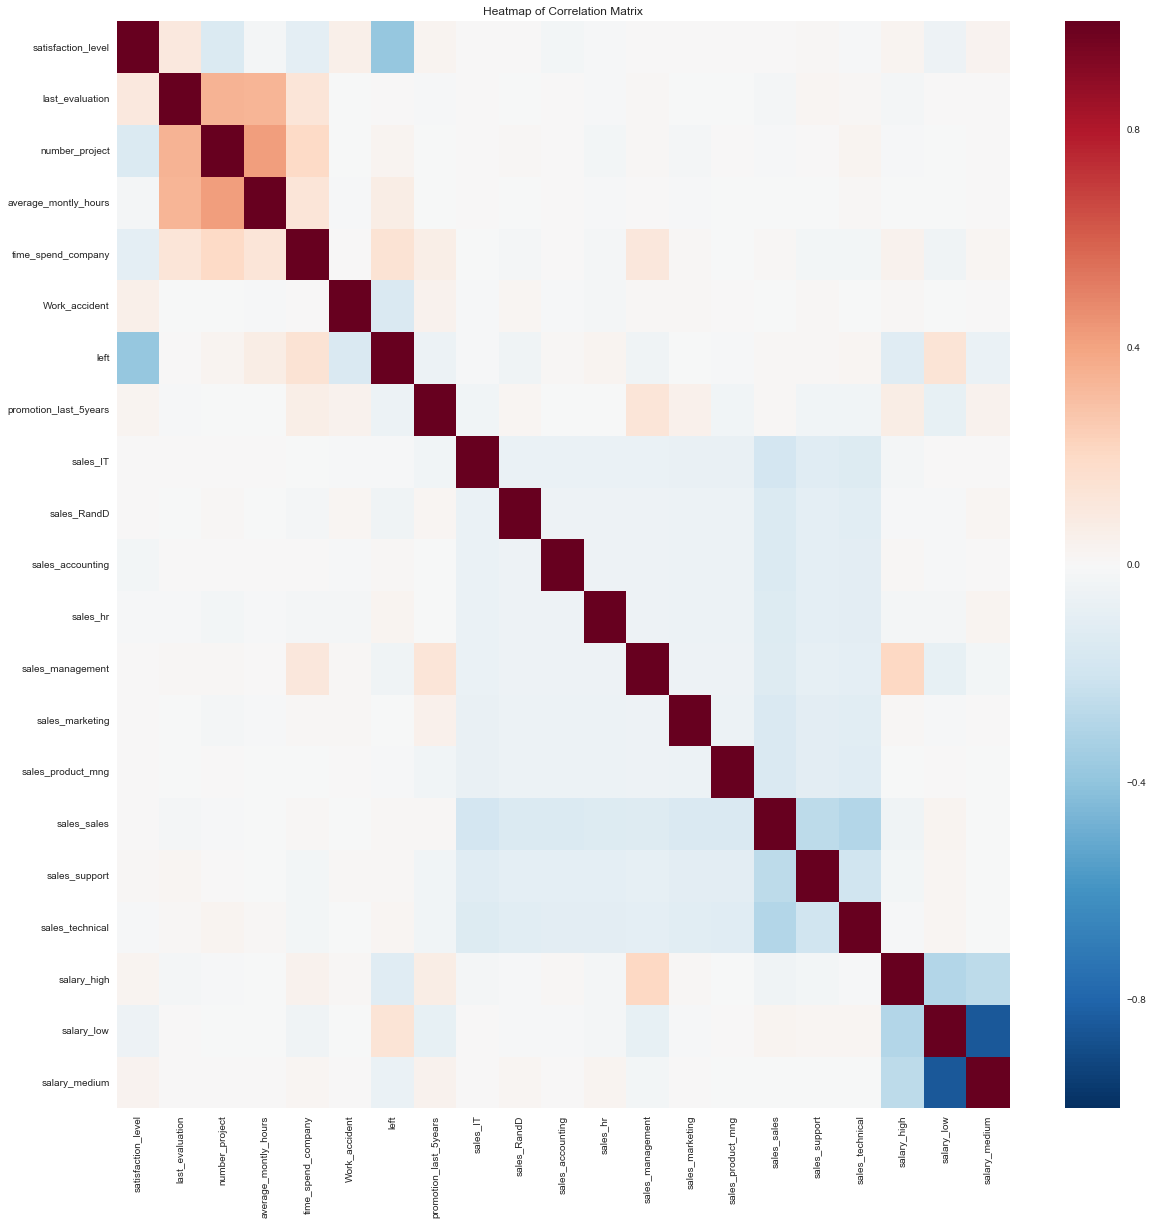

In [13]:
# Let's make that plot a bit larger
plt.figure(figsize = (20,20))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
sns.plt.title('Heatmap of Correlation Matrix')

In [ ]:
#Extract 'left' column, because 'left' is our target value
corr_left = pd.DataFrame(corr['left'].drop('left'))
corr_left.sort_values(by = 'left', ascending = False)

#### Important !!!
The correlation only shows us a linear correlation between variables and you should only use this as a rough guide to gain an understanding of the dataset. This is just an exploratory measure.

In [ ]:
# Visualise the data to understand what might be happening with the employees leaving
#time spend with promotion
plt.figure(figsize = (10,6))
sns.barplot(x='time_spend_company', y = 'left', hue = 'promotion_last_5years', data = hr_data)

In [ ]:
# Visualise the data to understand what might be happening with the employees leaving
#time spend with promotion
plt.figure(figsize = (16,6))
sns.barplot(x='sales', y = 'left', data = hr_data)

In [ ]:
#Boxplot of satisfaction level
g = sns.FacetGrid(data, col = 'left')
g.map(sns.boxplot, 'satisfaction_level')

In [ ]:
#Boxplot of last evaluation
g = sns.FacetGrid(data, col = 'left')
g.map(sns.boxplot, 'last_evaluation')

In [ ]:
plt.figure(figsize = (12,12))
plt.subplot(1,2,1)
plt.plot(data.satisfaction_level[data.left == 1],data.last_evaluation[data.left == 1],'o', alpha = 0.1)
plt.ylabel('Last Evaluation')
plt.title('Employees who left')
plt.xlabel('Satisfaction level')

plt.subplot(1,2,2)
plt.title('Employees who stayed')
plt.plot(data.satisfaction_level[data.left == 0],data.last_evaluation[data.left == 0],'o', alpha = 0.1)
plt.xlim([0.4,1])
plt.ylabel('Last Evaluation')
plt.xlabel('Satisfaction level')

In [ ]:
#Train-Test split
from sklearn.model_selection import train_test_split
data = hr_data_with_dummies.drop('left', 1)
label = hr_data_with_dummies.left
data_train, data_test, label_train, label_test = train_test_split(data, label, test_size = 0.2, random_state = 42)

In [ ]:
# Decision tree
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(data_train, label_train)
dt_score_train = dt.score(data_train, label_train)
print("Training score: ",dt_score_train)
dt_score_test = dt.score(data_test, label_test)
print("Testing score: ",dt_score_test)

In [ ]:
# Install necessary packages
! pip install graphviz
! pip install pydot

In [ ]:
from io import StringIO
from sklearn.tree import export_graphviz

out = StringIO()
tree.export_graphviz(dt, out_file = out)
# OUTPUT DOT LANGUAGE SCRIPTS
print(out.getvalue())

In [ ]:
# Create a feature vector
features = hr_data_with_dummies.columns.tolist()

from sklearn.tree import export_graphviz
tree.export_graphviz(dt, out_file='tree_hr_analysis.dot', feature_names=features)

#### Visualising the tree is a bit of a hassle... 

You can try copying and pasting the tree from the dot output into a tool like,
(webgraphviz)[http://www.webgraphviz.com/].

- What is the first thing you notice?

In [ ]:
# Let's try running this with not as much depth
# Decision tree
from sklearn import tree
dt = tree.DecisionTreeClassifier(random_state=1, max_depth=2)
dt.fit(data_train, label_train)
dt_score_train = dt.score(data_train, label_train)
print("Training score: ",dt_score_train)
dt_score_test = dt.score(data_test, label_test)
print("Testing score: ",dt_score_test)

# Create a feature vector
features = hr_data_with_dummies.columns.tolist()

from sklearn.tree import export_graphviz
tree.export_graphviz(dt, out_file='tree_hr_analysis_smaller_tree.dot', feature_names=features)

#### Now we've got something that's getting a bit more useful.

Answer the following questions:
- What's the most important feature?
- How do we read the tree?
- What are some of the things we could try to 

# Below are some further examples of how classification and regression trees work

Run through the examples below and ask if you have any questions

In [ ]:
'''

Classification and Regression Trees

'''
from sklearn import tree
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

%matplotlib inline


In [ ]:
'''
Read, Explore, and Process data
'''

# Read in the data
titanic = pd.read_csv('../../data/titanic.csv')

# Take a  selection of the variables
d = titanic[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]



In [ ]:
# Check for missing values in all columns
d.isnull().sum()
d.groupby(['Sex', 'Pclass']).Age.apply(lambda x: x.isnull().sum()) / d.groupby(['Sex', 'Pclass']).Age.count()

# Convert all variables to numeric so for scikit learn
d['Sex'] = np.where(d.Sex == 'female', 1, 0)

# Fill in missing values with the mean value (hint: use .fillna())
d['Age'] = d['Age'].fillna(d['Age'].mean())

# Explore the data to identify trends in characteristics of survivors
d.Survived.value_counts()                    # How many people lived and died
d.Survived.mean()                            # The survival rate for everyone
d.groupby('Sex').Survived.mean()             # By Sex: women have higher survival rates
d.groupby('Pclass').Survived.mean()          # By Pclass: 1st class passengers have higher survival rates
d.groupby(['Sex', 'Pclass']).Survived.mean() # By Sex and Pclass: Women in the 1st and 2nd classes had the highest survival rates

# Create a proxy variable representing whether the Spouse was on board
d['Spouse'] = ((d.Age > 18) & (d.SibSp >= 1)).astype(int)
d.Spouse.value_counts()
d.groupby(['Pclass', 'Spouse']).Survived.mean() # Having a spouse appears to increase survival in the 1st class only




In [ ]:
'''

Split into training and test datasets, and build the model

'''

survived = d['Survived']
del d['Survived']

d


In [ ]:
# Now, split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(d,survived, random_state=1)

# Create a decision tree classifier instance (start out with a small tree for interpretability)
ctree = tree.DecisionTreeClassifier(random_state=1, max_depth=2)

# Fit the decision tree classifier
ctree.fit(X_train, y_train)


# Create a feature vector
features = d.columns.tolist()

features


In [ ]:
X_train

In [ ]:
# How to interpret the diagram?
ctree.classes_


In [ ]:
# Predict what will happen for 1st class woman
#features
ctree.predict_proba([1, 1, 25, 0, 0, 0])
ctree.predict([1, 1, 25, 0, 0, 0])


In [ ]:

# Predict what will happen for a 3rd class man
ctree.predict_proba([3, 0, 25, 0, 0, 0])
ctree.predict([3, 0, 25, 0, 0, 0])


In [ ]:
from io import StringIO
out = StringIO()
tree.export_graphviz(ctree, out_file = out)
# OUTPUT DOT LANGUAGE SCRIPTS
print out.getvalue()

In [ ]:
out.getvalue()

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(ctree, out_file='tree_vehicles.dot', feature_names=features)

In [ ]:
from IPython.display import Image
import pydot
# make sure pydot and graphviz are installed 
# if problems see here:
# http://stackoverflow.com/questions/15951748/pydot-and-graphviz-error-couldnt-import-dot-parser-loading-of-dot-files-will/17902926#17902926

dot_data = StringIO()  
tree.export_graphviz(
    ctree, 
    out_file=dot_data,
    feature_names=features,  
    class_names=["died","survived"],  
    filled=True, 
    rounded=True,  
    special_characters=True
)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:

# Which features are the most important?
ctree.feature_importances_

# Clean up the output
pd.DataFrame(zip(features, ctree.feature_importances_)).sort_index(by=1, ascending=False)

# Make predictions on the test set
preds = ctree.predict(X_test)

# Calculate accuracy
metrics.accuracy_score(y_test, preds)

# Confusion matrix
pd.crosstab(y_test, preds, rownames=['actual'], colnames=['predicted'])

# Make predictions on the test set using predict_proba
probs = ctree.predict_proba(X_test)[:,1]

# Calculate the AUC metric
metrics.roc_auc_score(y_test, probs)

# Decision Trees have notorouisly high variance, so what can we do
# to better estimate the out of sample error of a high variance model?



In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
ctree = tree.DecisionTreeClassifier(random_state=1, max_depth=2)

# compare AUC using cross-validation
from sklearn.cross_validation import cross_val_score
cross_val_score(logreg, d, survived, cv=10, scoring='roc_auc').mean()
cross_val_score(ctree, d, survived, cv=10, scoring='roc_auc').mean()


# so far logistic regression is winning..

'''

FINE-TUNING THE TREE

'''
from sklearn.grid_search import GridSearchCV


# check CV score for max depth = 3
ctree = tree.DecisionTreeClassifier(max_depth=3)
np.mean(cross_val_score(ctree, d, survived, cv=5, scoring='roc_auc'))

# check CV score for max depth = 10
ctree = tree.DecisionTreeClassifier(max_depth=10)
np.mean(cross_val_score(ctree, d, survived, cv=5, scoring='roc_auc'))


In [ ]:

# Conduct a grid search for the best tree depth
ctree = tree.DecisionTreeClassifier(random_state=1)
depth_range = range(1, 20)
param_grid = dict(max_depth=depth_range)
grid = GridSearchCV(ctree, param_grid, cv=5, scoring='roc_auc')
grid.fit(d, survived)



In [ ]:

# Check out the scores of the grid search
grid_mean_scores = [result[1] for result in grid.grid_scores_]


# Plot the results of the grid search
plt.figure()
plt.plot(depth_range, grid_mean_scores)
plt.hold(True)
plt.grid(True)
plt.plot(grid.best_params_['max_depth'], grid.best_score_, 'ro', markersize=12, markeredgewidth=1.5,
         markerfacecolor='None', markeredgecolor='r')


In [ ]:

# Get the best estimator
best = grid.best_estimator_

cross_val_score(best, d, survived, cv=10, scoring='roc_auc').mean()
cross_val_score(logreg, d, survived, cv=10, scoring='roc_auc').mean()


# Still not as good as Logistic Regression.. 
# Let's try something else



### EXERCISE ###
''' Use Grid Search try scan over three parameters
1. max_depth:     from 1 to 20
2. criterion:     (either 'gini' or 'entropy')
3. max_features : range (1,5)

'''


### Regression

In [ ]:
# Decision trees (like many other classification models)
# can also be used for regression!


drinks = pd.read_csv('../../data/drinks.csv', na_filter=False)

drinks

# Make dummy columns for each of the 6 regions
for continent_ in ['AS', 'NA', 'EU', 'AF', 'SA', 'OC']:
    drinks[continent_] = drinks['continent'] == continent_

drinks


del drinks['continent']
del drinks['country']
del drinks['total_litres_of_pure_alcohol'] # this doesn't seem fair does it?

X = drinks.drop('wine_servings', axis=1)
y = drinks['wine_servings']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)


rtree = tree.DecisionTreeRegressor()

rtree.fit(X_train, y_train)
rtree.predict(X_test)

scores = cross_val_score(rtree, X, y, cv=10, scoring='mean_squared_error')
mse_scores = -scores
mse_scores
rmse_scores = np.sqrt(mse_scores)
rmse_scores
rmse_scores.mean()

wine_mean = y.mean()
wine_mean

features = X.columns
pd.DataFrame(zip(features, rtree.feature_importances_)).sort_index(by=1, ascending=False)

